# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt


**Step 2:** Load the dataset _(done for you)_.

In [2]:

iris_data = load_iris()


In [3]:
dir(iris_data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names

def create_df():
    
    # YOUR CODE HERE
    df = pd.DataFrame(iris_data.data, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])
    df['target'] = iris_data['target']
    df['class'] = df['target'].apply(lambda x: iris_data.target_names[x])
    
    return df
df_iris = create_df()
df_iris.sample(n=10)

,sepal length,sepal width,petal length,petal width,target,class
130,7.4,2.8,6.1,1.9,2,virginica
40,5.0,3.5,1.3,0.3,0,setosa
101,5.8,2.7,5.1,1.9,2,virginica
80,5.5,2.4,3.8,1.1,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
34,4.9,3.1,1.5,0.2,0,setosa
66,5.6,3.0,4.5,1.5,1,versicolor
41,4.5,2.3,1.3,0.3,0,setosa
134,6.1,2.6,5.6,1.4,2,virginica


In [5]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [6]:

#From our data we will only get variable columns as np.array
x = 0
x = df_iris[['sepal length', 'sepal width', 'petal length', 'petal width']].values

In [7]:
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [8]:
mergings = 0 

mergings = linkage(x, method='complete')

In [9]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

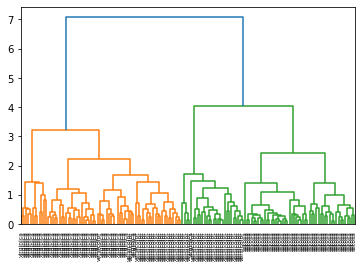

In [10]:
dn = 0

varieties = df_iris['class'].values
dn = dendrogram(mergings, labels=varieties, leaf_font_size=6, leaf_rotation=90)
plt.show()

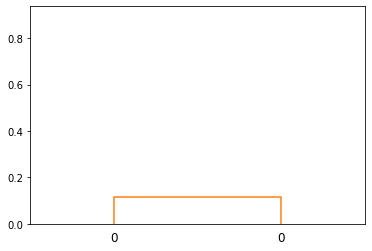

In [11]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [14]:
from sklearn.cluster import KMeans

df = pd.read_csv('ch1ex1.csv')
points = df.values

new_df = pd.read_csv('ch1ex2.csv')
new_points = new_df.values


**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [15]:
model = 0

model = KMeans(n_clusters=3)

In [16]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [17]:
model.fit(points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [18]:
labels = model.predict(points)

In [19]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [20]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2
def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []

    for i in range(len(labels)):
        if labels[i] == 0:
            data_0.append(points[i])
        elif labels[i] == 1:
            data_1.append(points[i])
        elif labels[i] == 2:
            data_2.append(points[i])
            
    data_0 = np.array(data_0)
    data_1 = np.array(data_1)
    data_2 = np.array(data_2)
    return data_0, data_1, data_2
    

data_0,data_1,data_2 =separate_labels(labels, points)

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

(94, 2)
(111, 2)
(95, 2)


In [21]:
enumerate(zip(labels))

In [22]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

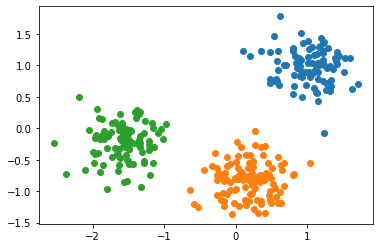

In [23]:
# plotting the data 

plt.scatter(data_0[:, 0], data_0[:, 1])
plt.scatter(data_1[:, 0], data_1[:, 1])
plt.scatter(data_2[:, 0], data_2[:, 1])

**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [24]:

new_labels = model.predict(new_points)


In [25]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [26]:
#separate the data by labels like we did before

new_0 = []
new_1 = []
new_2 = []

for i in range(len(new_labels)):
    if new_labels[i] == 0:
        new_0.append(new_points[i])
    elif new_labels[i] == 1:
        new_1.append(new_points[i])
    elif new_labels[i] == 2:
        new_2.append(new_points[i])
            
new_0 = np.array(new_0)
new_1 = np.array(new_1)
new_2 = np.array(new_2)



In [27]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

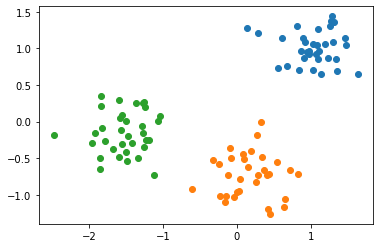

In [28]:
#plot the new labels


plt.scatter(new_0[:, 0], new_0[:, 1])
plt.scatter(new_1[:, 0], new_1[:, 1])
plt.scatter(new_2[:, 0], new_2[:, 1])

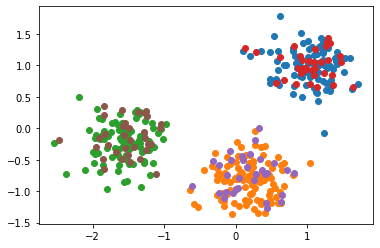

In [29]:
#plot all the points together

plt.scatter(data_0[:, 0], data_0[:, 1])
plt.scatter(data_1[:, 0], data_1[:, 1])
plt.scatter(data_2[:, 0], data_2[:, 1])

plt.scatter(new_0[:, 0], new_0[:, 1])
plt.scatter(new_1[:, 0], new_1[:, 1])
plt.scatter(new_2[:, 0], new_2[:, 1])